# Automobile Price Prediction using Linear Regression
By - T Sathya Narayana

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/kaggle/input/automobile-dataset/AutoData.csv')

In [ ]:
df.head(5)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [ ]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Performing Exploratory data analysis

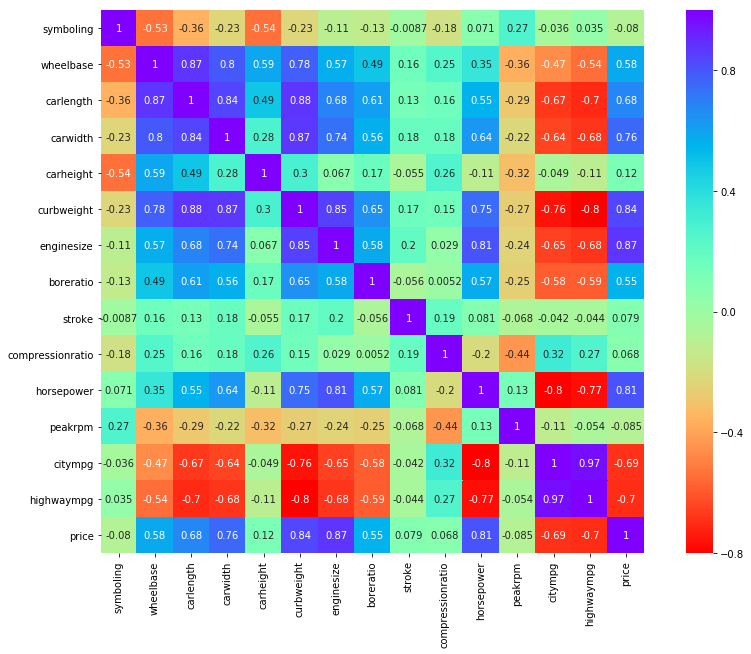

In [ ]:
plt.subplots(figsize=(15,10))
sns_plot = sns.heatmap(df.corr(),annot =True,cmap='rainbow_r',square=True)
fig = sns_plot.get_figure()
fig.savefig("corrHeatmap.png")

In [ ]:
tempdf = df[{'symboling','enginetype','boreratio','horsepower', 'peakrpm', 'citympg', 'highwaympg','enginesize','price'}]

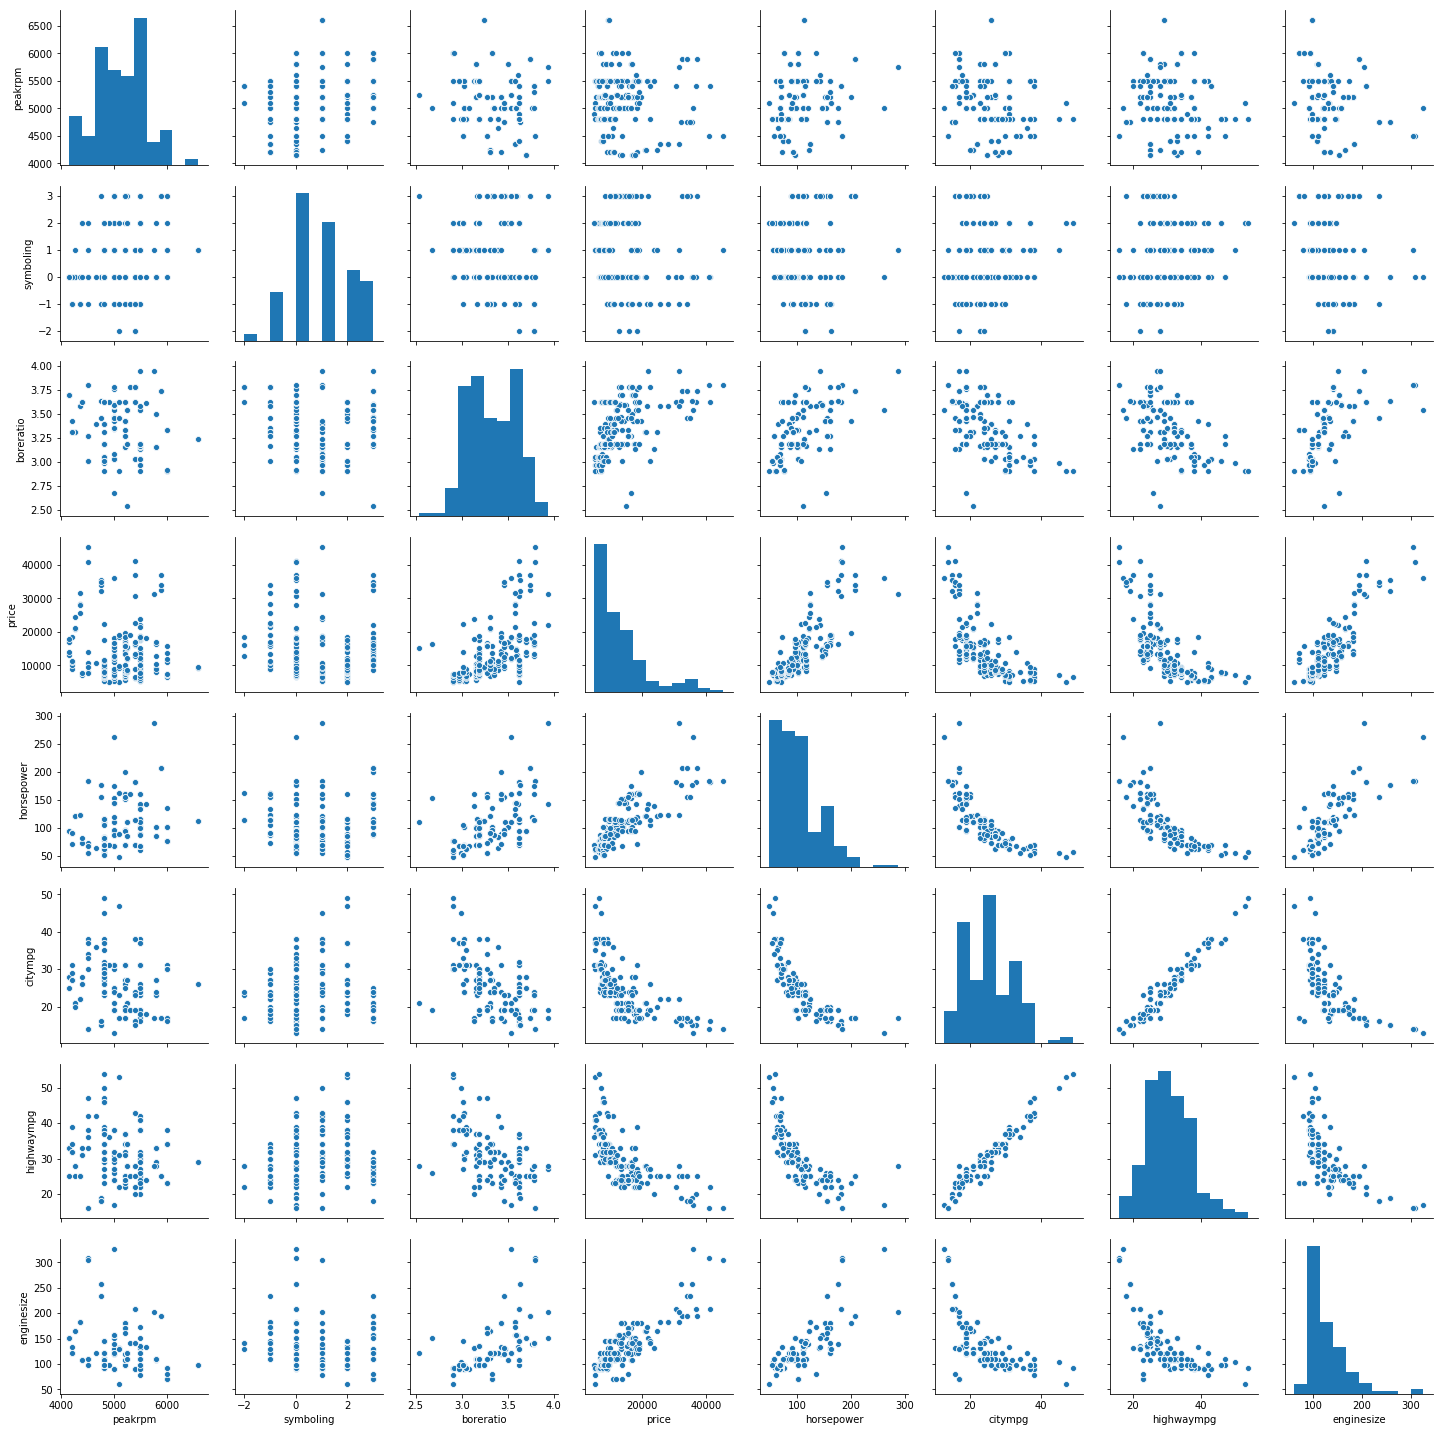

In [ ]:
sns.pairplot(tempdf)

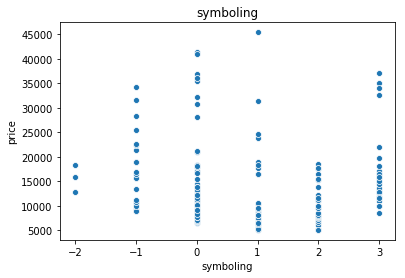

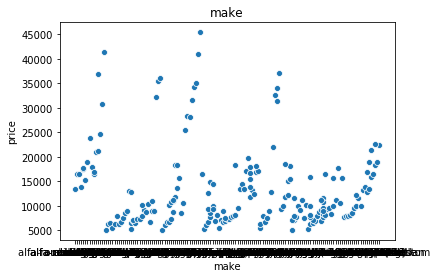

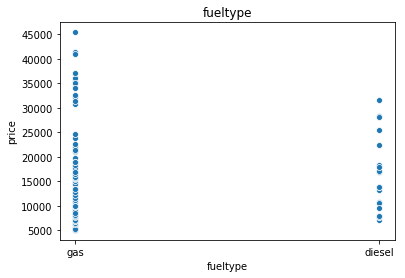

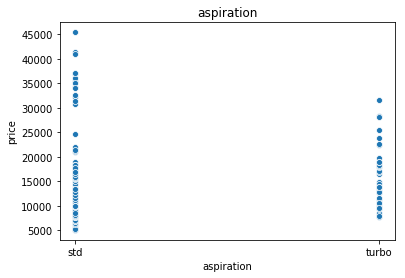

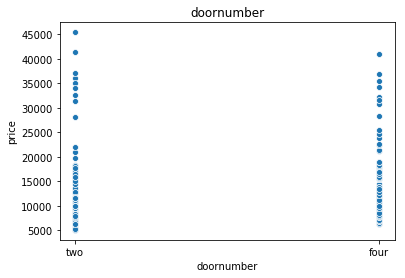

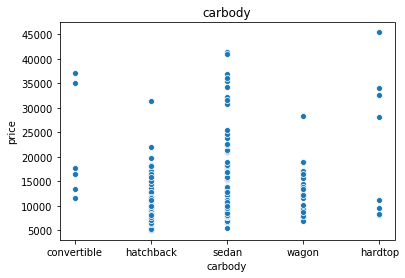

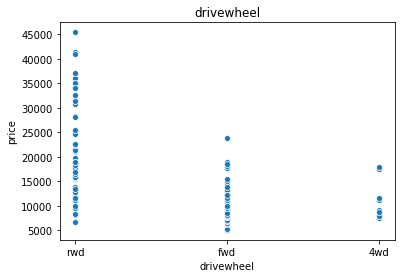

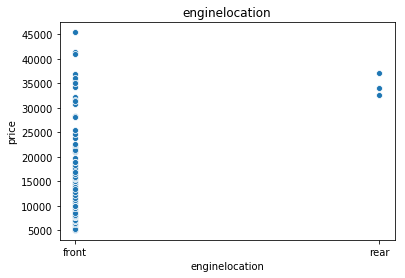

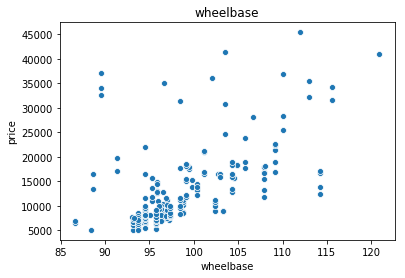

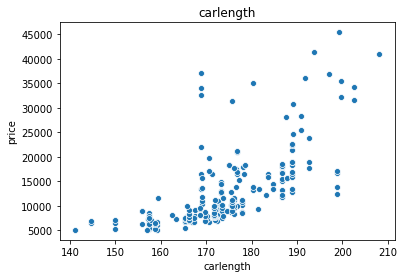

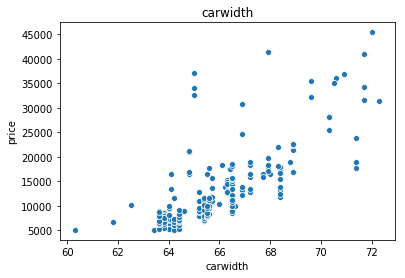

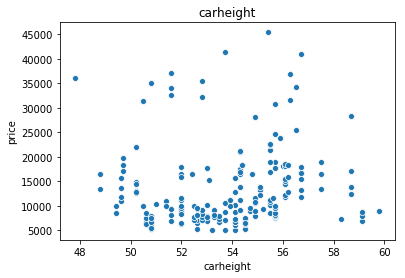

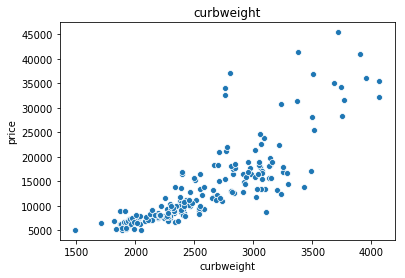

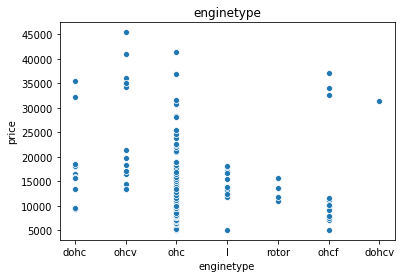

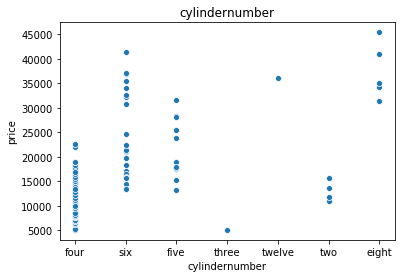

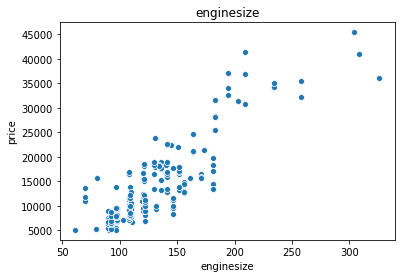

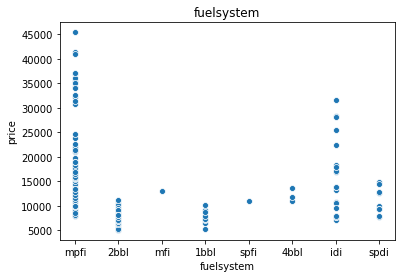

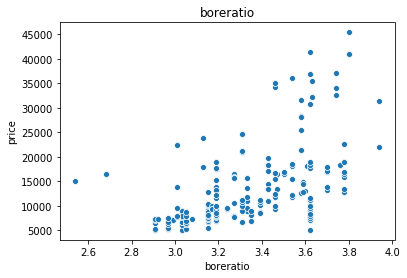

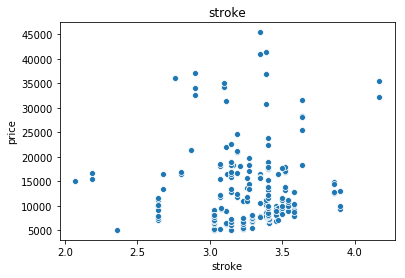

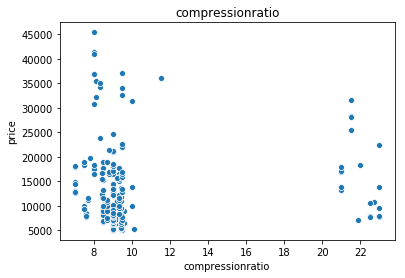

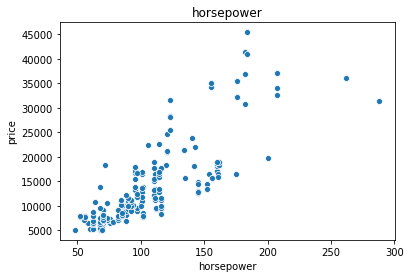

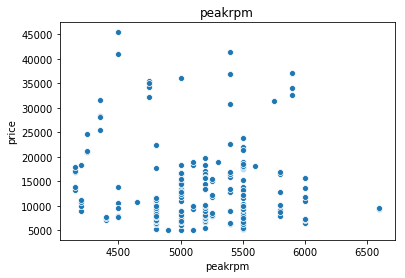

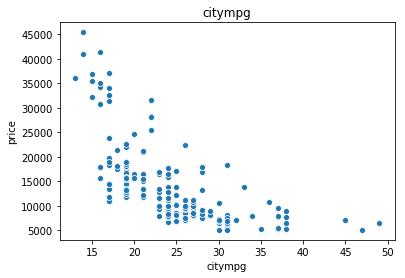

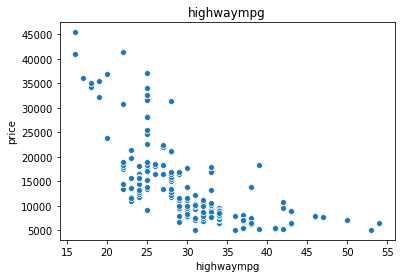

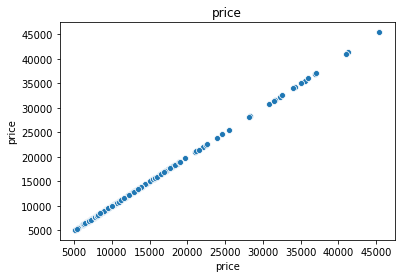

In [ ]:
for i in df.columns:
    plt.title(i)
    sns.scatterplot(df[i],df['price'])
    plt.show()

In [ ]:
bestvar1 = ['wheelbase','carlength','carwidth','curbweigth','enginesize']

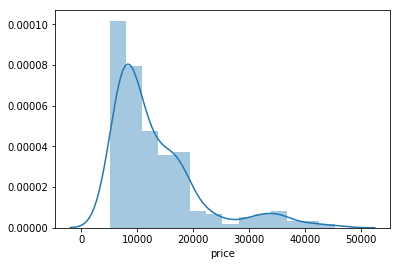

In [ ]:
sns.distplot(df['price'])

###### we see there are cars highest in price range below !0000 $

## Pre processing the data

In [ ]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
df1 = df.drop({'make','carlength','carwidth','aspiration', 'doornumber','carbody','drivewheel','carheight',"enginelocation"},axis=1)

In [ ]:
df1.columns

Index(['symboling', 'fueltype', 'wheelbase', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df1

,symboling,fueltype,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,109.1,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,109.1,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,109.1,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,109.1,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df1['fueltype']= label_encoder.fit_transform(df['fueltype']) 
df1['fueltype'].unique()

array([1, 0])

In [ ]:
df1

,symboling,fueltype,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,109.1,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,109.1,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,109.1,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,109.1,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df1['enginetype']= label_encoder.fit_transform(df['enginetype']) 
df1['enginetype'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [ ]:
df1['fuelsystem']= label_encoder.fit_transform(df['fuelsystem']) 
df1['fuelsystem'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6])

In [ ]:
from word2number import w2n

In [ ]:
nums = []
for i in df1['cylindernumber']:
    x = w2n.word_to_num(i)
    nums.append(x)
df1['cylindernumber'] = nums

In [ ]:
df1

,symboling,fueltype,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,88.6,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,88.6,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,94.5,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,99.8,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,99.4,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,109.1,2952,3,4,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,109.1,3049,3,4,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,109.1,3012,5,6,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,109.1,3217,3,6,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


##  Performing Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm

In [ ]:
X = df1[['horsepower']]#.values.reshape(1,-1)
y = df1[['price']]#.values.reshape(1,-1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
r2_score(y_pred,y_test)

0.2797961850633671

In [ ]:
print('Coefficient is',LR.coef_[0][0])
print('intercept is',LR.intercept_[0])

Coefficient is 157.5252402805359
intercept is -3241.804243638462


Text(27.125, 0.5, 'Price')

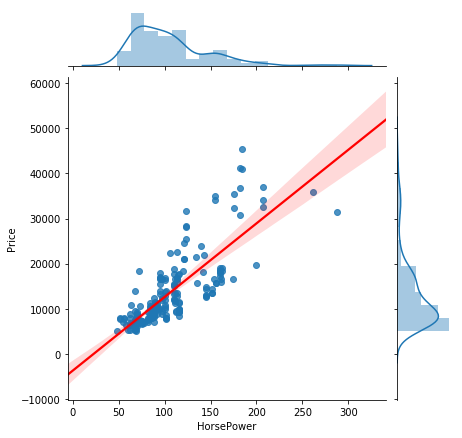

In [ ]:
g = sns.jointplot(X,y,kind='reg',
                 joint_kws={'line_kws':{'color':'red'}})
plt.xlabel('HorsePower')
plt.ylabel('Price')

<function matplotlib.pyplot.show(*args, **kw)>

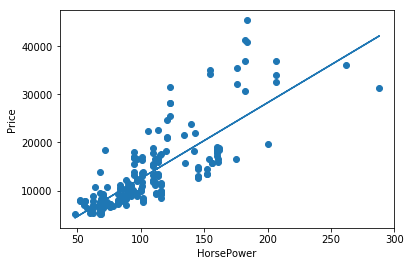

In [ ]:
plt.scatter(X,y)
plt.plot(X,LR.predict(X))
plt.xlabel('HorsePower')
plt.ylabel('Price')
plt.show

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              1854.
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                   2.43e-104
Time:                        17:42:58   Log-Likelihood:                         -2031.7
No. Observations:                 205   AIC:                                      4065.
Df Residuals:                     204   BIC:                                      4069.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

###### It's clearly seen that the Regression Line is in Best Fit


